<H1 style="text-align: center;">
  Cat Breed Classification using CNN
</H1>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-12-18 09:45:06.160749: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 09:45:06.167257: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 09:45:06.262828: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 09:45:06.329484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734511506.388666   29999 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734511506.40

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/omar/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/omar/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/omar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/omar/anacond

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/omar/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/omar/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/omar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/omar/anacond

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/omar/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/omar/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/omar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/omar/anacond

AttributeError: _ARRAY_API not found

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1036 images belonging to 3 classes.
Found 209 images belonging to 3 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes for Siamese, Orange, and Sphynx
])


/home/omar/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-18 10:12:44.561137: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

/home/omar/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.5460 - loss: 0.9885

/home/omar/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.5488 - loss: 0.9835 - val_accuracy: 0.7895 - val_loss: 0.5712
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.7594 - loss: 0.6128 - val_accuracy: 0.8565 - val_loss: 0.3918
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.8114 - loss: 0.4975 - val_accuracy: 0.8182 - val_loss: 0.5093
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 351ms/step - accuracy: 0.7676 - loss: 0.5711 - val_accuracy: 0.8995 - val_loss: 0.3156
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 337ms/step - accuracy: 0.8212 - loss: 0.4684 - val_accuracy: 0.8804 - val_loss: 0.3581
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 319ms/step - accuracy: 0.8096 - loss: 0.4810 - val_accuracy: 0.8852 - val_loss: 0.3212
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.8314 - loss: 0.4635 - val_accuracy: 0.8756 - val_loss: 0.3250
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 313ms/step - accuracy: 0.8252 - loss: 0.4600 - val_accuracy: 0.8804

In [6]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9727 - loss: 0.0928
Validation Accuracy: 96.65%


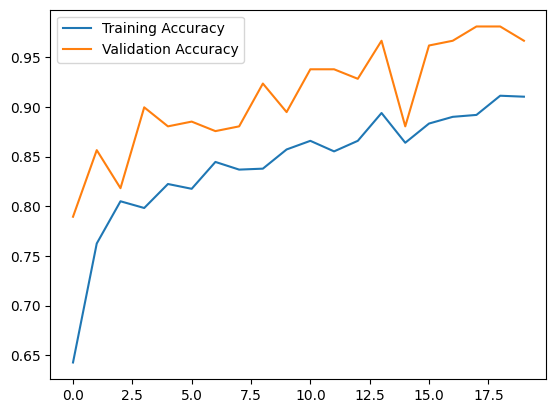

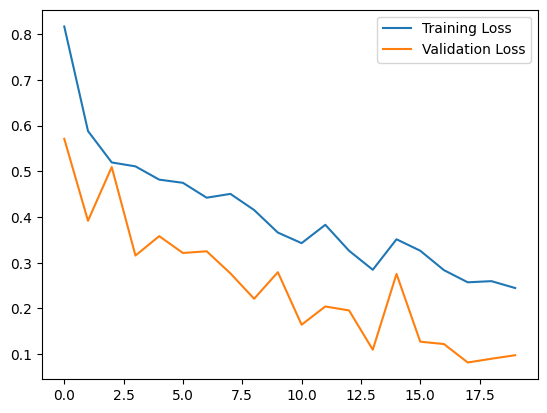

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [13]:
# Convert class indices to a list
class_labels = list(test_generator.class_indices.keys())

# Display results for a few images
import numpy as np
for i in range(5):
    image, label = test_generator[i]  # Get the image and its label
    pred_class = np.argmax(predictions[i])  # Get the predicted class index
    actual_class = np.argmax(label)  # Get the actual class index from the one-hot encoding

    # Print the predicted and actual class names
    print(f"Predicted: {class_labels[pred_class]}, Actual: {class_labels[actual_class]}")


Predicted: orange, Actual: orange
Predicted: orange, Actual: orange
Predicted: orange, Actual: orange
Predicted: orange, Actual: orange
Predicted: sphynx, Actual: orange


In [12]:
model.save('cat_breed_classifier.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


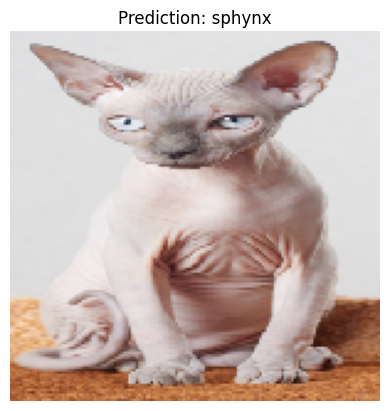

Predicted class: sphynx


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Image
img_path = 'Screenshot from 2024-12-18 10-23-21.png'  # Replace with your image path

# Load the image, resize it to (150, 150), and preprocess it
img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Rescale pixel values to [0, 1]

# Step 2: Make a Prediction
predictions = model.predict(img_array)

# Step 3: Decode the Prediction
class_labels = list(test_generator.class_indices.keys())  # List of class names (same order as model output)
predicted_class_index = np.argmax(predictions[0])  # Get the index of the class with the highest probability
predicted_class = class_labels[predicted_class_index]  # Get the predicted class name

# Step 4: Display the Image and Prediction
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')  # Hide axes
plt.show()

# Optionally, print the prediction
print(f"Predicted class: {predicted_class}")